Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Data Loading


In [ ]:
#https://www.kaggle.com/snap/amazon-fine-food-reviews

In [ ]:
! pip install -q kaggle

In [ ]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [ ]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# import the dataset
! kaggle datasets download -d snap/amazon-fine-food-reviews

 96% 233M/242M [00:02<00:00, 122MB/s]
100% 242M/242M [00:02<00:00, 117MB/s]


In [ ]:
! unzip /content/amazon-fine-food-reviews

Archive:  /content/amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
df = pd.read_csv('/content/Reviews.csv')

Data Preprocessing

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.001227,0.000770,0.010706,0.007912
HelpfulnessNumerator,0.001227,1.000000,0.974689,-0.032590,-0.154818
HelpfulnessDenominator,0.000770,0.974689,1.000000,-0.097986,-0.173289
Score,0.010706,-0.032590,-0.097986,1.000000,-0.062760
Time,0.007912,-0.154818,-0.173289,-0.062760,1.000000


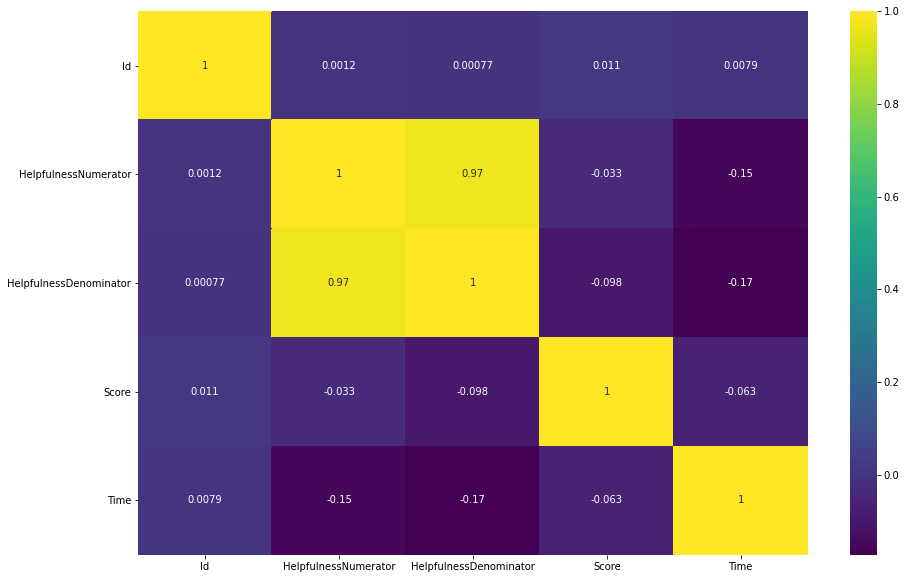

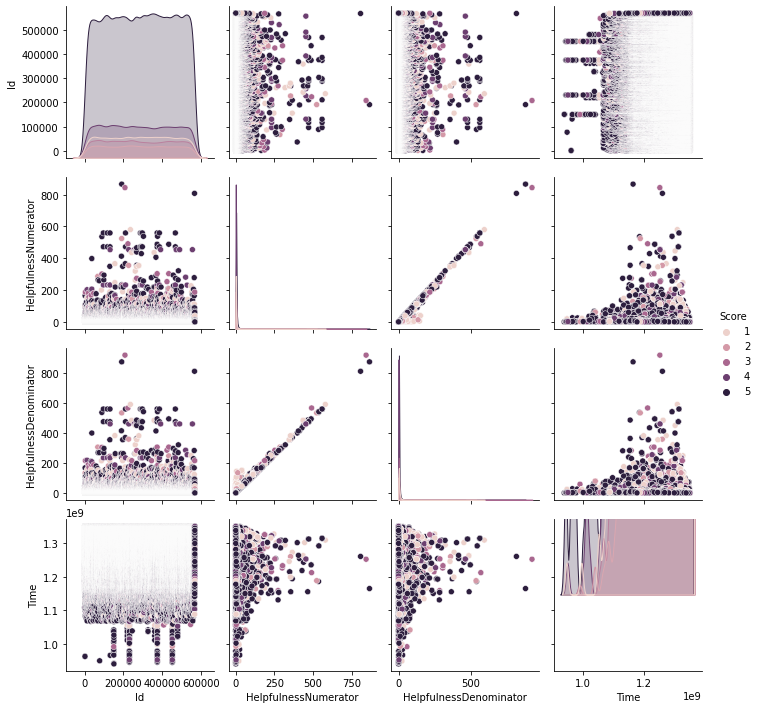

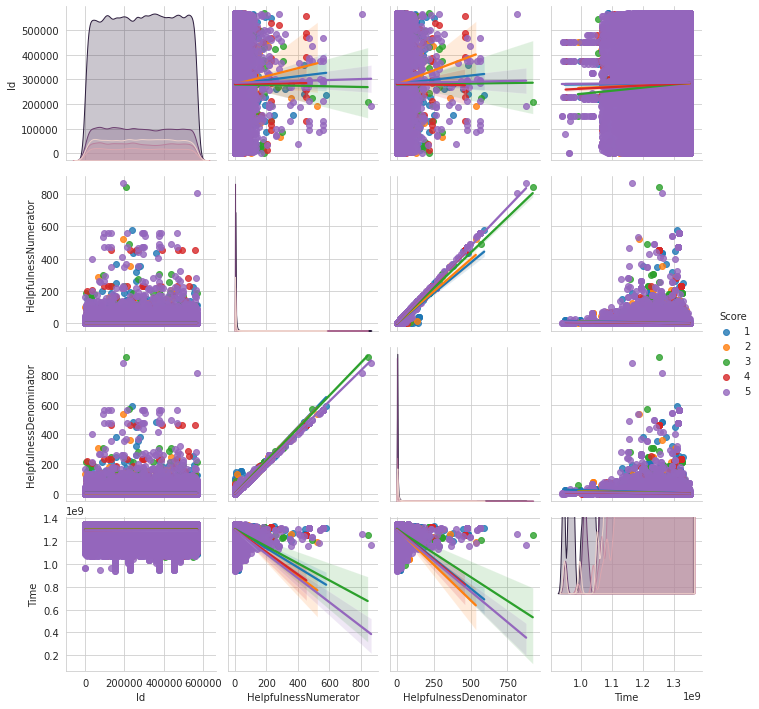

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

sns.pairplot(data=df, hue='Score')

sns.set_style("whitegrid")
sns.pairplot(data=df, hue='Score', kind='reg')



In [ ]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [ ]:
df = df[['Text', 'Score']].dropna()

In [ ]:
df.tail()

,Text,Score
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5
568453,"I am very satisfied ,product is as advertised,...",5


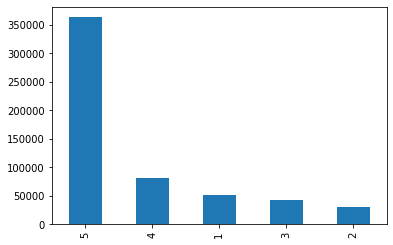

In [ ]:
ax=df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()

In [ ]:
df.Score[df['Score']<=3] = 0
df.Score[df['Score']>3] = 1

In [ ]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [ ]:
df['Score'].value_counts()

1    443777
0    124677
Name: Score, dtype: int64

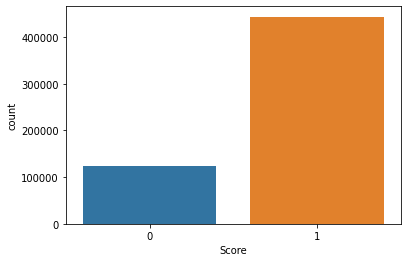

In [ ]:
sns.countplot(data=df,x=df['Score'])

In [ ]:
train_pos = df[df.Score == 1][:10000]
train_neg = df[df.Score == 0][:10000] 

In [ ]:
train_d = train_pos.append(train_neg, ignore_index=True)

In [ ]:
train_d.shape

(20000, 2)

In [ ]:
train_d.isnull().sum()

Text     0
Score    0
dtype: int64

In [ ]:
train_d.describe()

,Score
count,20000.000000
mean,0.500000
std,0.500013
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
train_d.rename(columns = {'Text': 'Review'}, inplace = True)

In [ ]:
x = train_d['Review']
y = train_d['Score']

Data Cleaning

In [ ]:
import string

In [ ]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
stopwords = list(STOP_WORDS)
stopwords

['how',
 'there',
 'get',
 '‘re',
 'around',
 '’s',
 'make',
 'almost',
 'amount',
 'ever',
 'nowhere',
 'off',
 'we',
 'too',
 'became',
 'because',
 'again',
 'about',
 'afterwards',
 'done',
 'enough',
 'nevertheless',
 'mostly',
 'can',
 'quite',
 're',
 'they',
 'throughout',
 'as',
 'was',
 'on',
 'himself',
 'toward',
 '‘m',
 'this',
 'using',
 'such',
 'therein',
 'does',
 'really',
 'side',
 'therefore',
 'when',
 'n’t',
 'beside',
 'least',
 'meanwhile',
 'often',
 'whatever',
 'below',
 'it',
 'those',
 'yet',
 'fifteen',
 'via',
 'under',
 'five',
 'were',
 'where',
 'within',
 'top',
 'through',
 'per',
 'who',
 "'re",
 'be',
 'before',
 'else',
 'formerly',
 'should',
 'eight',
 'third',
 'wherein',
 'less',
 'at',
 'he',
 'onto',
 'indeed',
 'every',
 'she',
 'back',
 'others',
 'perhaps',
 'behind',
 'also',
 'herein',
 'not',
 'well',
 'yours',
 'yourself',
 'call',
 'full',
 'anyhow',
 'something',
 'move',
 'may',
 'our',
 'whenever',
 'cannot',
 'name',
 'whereas',


In [ ]:
nlp = spacy.load('en_core_web_sm')
# function for data cleaning
def text_data_cleaning(sentence):
  doc = nlp(sentence)
  tokens = []
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip() 
    else:
      temp = token.lower_
    tokens.append(temp)
  cleaned_tokens = []  
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens


In [ ]:
text_data_cleaning("Hello all, It's a beautiful day outside there!")

['hello', 'beautiful', 'day', 'outside']

Building the model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pickle

In [ ]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)

In [ ]:
naive_classifier = MultinomialNB()
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
adab_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=400, learning_rate=1)
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
lr_classifier = LogisticRegression(random_state=0)
svcl_classifier = SVC(kernel = 'linear', random_state = 0)
svcr_classifier = SVC(kernel = 'rbf', random_state = 0)
mlp_classifier = MLPClassifier(alpha=1, max_iter=1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((16000,), (4000,))

In [ ]:
X_train.tail()

13123    Good coffee. I guess I expected it to be very ...
19648    Nature's Variety Snacks seem to have the right...
9845     as i expected its a great taste and healthy an...
10799    Fortunately, before I purchased I read through...
2732     I love The Meadow.  So I guess this review is ...
Name: Review, dtype: object

In [ ]:
naive_clf = Pipeline([('tfidf', tfidf), ('clf', naive_classifier)])
dt_clf = Pipeline([('tfidf', tfidf), ('clf', dt_classifier)])
adab_clf = Pipeline([('tfidf', tfidf), ('clf', adab_classifier)])
rf_clf = Pipeline([('tfidf', tfidf), ('clf', rf_classifier)])
knn_clf = Pipeline([('tfidf', tfidf), ('clf', knn_classifier)])
lr_clf = Pipeline([('tfidf', tfidf), ('clf', lr_classifier)])
svcl_clf = Pipeline([('tfidf', tfidf), ('clf', svcl_classifier)])
svcr_clf = Pipeline([('tfidf', tfidf), ('clf', svcr_classifier)])
mlp_clf = Pipeline([('tfidf', tfidf), ('clf', mlp_classifier)])

In [ ]:
naive_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, ma

In [ ]:
adab_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fba31efee18>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fi

In [ ]:
rf_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fba31efee18>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                  

In [ ]:
svcl_clf.fit(X_train, y_train)
svcr_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fba31efee18>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     co

In [ ]:
mlp_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                     

Saving trained model to local file system

In [ ]:
filename_naive = 'naive_model.sav'
filename_dt = 'dt_model.sav'
filename_adab = 'adab_model.sav'
filename_rf = 'rf_model.sav'
filename_knn = 'knn_model.sav'
filename_lr = 'lr_model.sav'
filename_svcl = 'svcl_model.sav'
filename_svcr = 'svcr_model.sav'
filename_mlp = 'mlp_model.sav'

pickle.dump(naive_clf, open(filename_naive, 'wb'))
pickle.dump(dt_clf, open(filename_dt, 'wb'))
pickle.dump(adab_clf, open(filename_adab, 'wb'))
pickle.dump(rf_clf, open(filename_rf, 'wb'))
pickle.dump(knn_clf, open(filename_knn, 'wb'))
pickle.dump(lr_clf, open(filename_lr, 'wb'))
pickle.dump(svcl_clf, open(filename_svcl, 'wb'))
pickle.dump(svcr_clf, open(filename_svcr, 'wb'))
pickle.dump(mlp_clf, open(filename_mlp, 'wb'))



Predicting the result

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# load the model from disk
naive_loaded_model = pickle.load(open(filename_naive, 'rb'))
naive_model_pred = naive_loaded_model.predict(X_test)
accuracy_score(y_test, naive_model_pred)

0.82475

In [ ]:
naive_pred = naive_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
adab_pred = adab_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
svcl_pred = svcl_clf.predict(X_test)
svcr_pred = svcr_clf.predict(X_test)
mlp_pred = mlp_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, naive_pred)

0.82475

In [ ]:
accuracy_score(y_test, dt_pred)

0.72175

In [ ]:
accuracy_score(y_test, adab_pred)

0.71675

In [ ]:
accuracy_score(y_test, rf_pred)

0.844

In [ ]:
accuracy_score(y_test, knn_pred)

0.7205

In [ ]:
accuracy_score(y_test, lr_pred)

0.841

In [ ]:
accuracy_score(y_test, svcl_pred)

0.84325

In [ ]:
accuracy_score(y_test, svcr_pred)

0.85675

In [ ]:
accuracy_score(y_test, mlp_pred)

0.82675

In [ ]:
confusion_matrix(y_test, naive_pred)

array([[1641,  365],
       [ 336, 1658]])

In [ ]:
confusion_matrix(y_test, dt_pred)

array([[1427,  579],
       [ 534, 1460]])

In [ ]:
confusion_matrix(y_test, adab_pred)

array([[1403,  603],
       [ 530, 1464]])

In [ ]:
confusion_matrix(y_test, rf_pred)

array([[1697,  309],
       [ 315, 1679]])

In [ ]:
confusion_matrix(y_test, knn_pred)

array([[1356,  650],
       [ 468, 1526]])

In [ ]:
confusion_matrix(y_test, lr_pred)

array([[1682,  324],
       [ 312, 1682]])

In [ ]:
confusion_matrix(y_test, svcl_pred)

array([[1681,  325],
       [ 302, 1692]])

In [ ]:
confusion_matrix(y_test, svcr_pred)

array([[1711,  295],
       [ 278, 1716]])

In [ ]:
confusion_matrix(y_test, mlp_pred)

array([[1764,  242],
       [ 451, 1543]])

In [ ]:
print(classification_report(y_test, naive_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2006
           1       0.82      0.83      0.83      1994

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2006
           1       0.72      0.73      0.72      1994

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
print(classification_report(y_test, adab_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2006
           1       0.71      0.73      0.72      1994

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2006
           1       0.84      0.84      0.84      1994

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      2006
           1       0.70      0.77      0.73      1994

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2006
           1       0.84      0.84      0.84      1994

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



In [ ]:
print(classification_report(y_test, svcl_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2006
           1       0.84      0.85      0.84      1994

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



In [ ]:
print(classification_report(y_test, svcr_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2006
           1       0.85      0.86      0.86      1994

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



In [ ]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2006
           1       0.86      0.77      0.82      1994

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



In [ ]:
print(rf_clf.predict(["I really like these sour bears and the fruity bears also by Surf Sweets. I was actually expecting small snack size bags for some reason and these are the larger bags for sharing. The bears are fresh and have an expiration date some time from now so no need to worry if they will be finished in time. Very delicious and vegan friendly as well!"]))

[1]


In [ ]:
print(knn_clf.predict(["We've bought Jennies macaroons for years now, so when we saw they had almond flavored macaroons, we didn't bat an eye. Bought 'em right away. When my daughter and I tasted them, we had to spit it all out. Maybe they were expired? There was no way to tell, but they were sickening. Due to them not being returnable, we had to throw out all 6 cans. The whole experience was hard to swallow."]))

[0]


In [ ]:
print(naive_clf.predict(["I was very pleased with the ingredient quality, taste (according to the kitties), price, and reasonable kibble size of this food. I fed this food to approximately 20 different cats and it was well received by the majority, even the extremely picky one. My cats eat a variety of food. They eat homemade raw, freeze dried raw, grain free dry/canned, and non grain-free dry/canned food. My personal, senior picky cat easily vomits with most food...this food was very easy on her sensitive stomach. I would not hesitate to purchase this food again"]))

[1]


In [ ]:
print(svcl_clf.predict(["These Macaroons are fantastic. We keep them in the fridge so they're chewy. The Almond taste is very strong but we love it that way."]))

[1]


In [ ]:
print(svcr_clf.predict(["This is the best example of buyer beware. The glucose rise happens 3-4 hrs after. Do not listen to the hype about cooking in acidic tomato sauce. Your stomach uses hydrochloric acid. A heck of a lot stronger than that in tomatoes. If you need to watch your blood glucose watch out and check at hr 3 and 4 and you will be shocked. No differece than regular pasta. The 5 grams of real fiber (inulin) just causes a delay in the high rise. Metamucill makes an easy dissolving fiber with inulin. Take it right before normal pasta ingestion and you have the same affect."]))

[0]


In [ ]:
print(lr_clf.predict(["The candy is tasty, but they totally scam you on the price. The jar is only the size of a soda can, and looks absolutely nothing like  the picture. I will not be buying this again. If your gonna sell something that small make the price around $5."]))

[0]


In [ ]:
print(dt_clf.predict(["I recently bought a bag of Michoko Carmel Candies when I was in Paris as a gift for the girls I work with. I wish that I had opened the bag and tried one before bringing it back to the US. This candy is fantastic and had I known this I would have brought home a suitcase full.  My co-workers loved them and the bag was gone before noon. I must now order them and have them shipped. If you like dark chocolate and caramel try a bag of Michoko Caramel Candies."]))

[1]


In [ ]:
print(adab_clf.predict(["Sweet Tree Organic Palm Sugar Blonde is the very best tasting of all the palm sugars.  It is easy to mix into warm or cold foods and tastes like a light brown sugar when baked or broiled.  It is no more expensive than any other palm sugars -- and it is organic.  Hopefully, Sweet Tree will make this available to us in larger quantities.  I bake, roast, broil and boil using the Sweet Tree palm sugar every week. Although palm sugar may not be for everyone, I was a border line diabetic, but after using many other artificial sweeteners with no success, palm sugar has helped to bring my AIC sugar level readings under diabetic levels. (Every individual reacts differently to sugar and artifical sweeteners. If you are diabetic it is very important when making a change to your diet to check your sugar levels at the appropriate time after consuming any unfamiliar sugar or sweetener products.)"]))

[1]


In [ ]:
print(mlp_clf.predict(["I only ordered this MFG brand of lingonberry because they were advertised as lingonberry with nothing added. WRONG! Sugar added just like all the others and these tasted so sweet like raisins...not one of my Swedish friends could tell they were eating lingonberries. Big disappointment."]))

[0]


In [ ]:
print(rf_clf.predict(["This is biggest scam i have ever seen about a product"]))

[0]


In [ ]:
print(dt_clf.predict(["This is a bad product and i got an expired one never ever purchase this!"]))

[0]


Visualization

In [ ]:
algos = ['NB', 'DT', 'ADAB', 'RF', 'K-NN', 'LR', 'SVCL', 'SVCR', 'MLP']
values = [accuracy_score(y_test, naive_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, adab_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, svcl_pred), accuracy_score(y_test, svcr_pred), accuracy_score(y_test, mlp_pred)]
data = {'Classifiers': algos, 'Accuracy': values}
res = pd.DataFrame(data=data)
res

,Classifiers,Accuracy
0,NB,0.82475
1,DT,0.72175
2,ADAB,0.71675
3,RF,0.84400
4,K-NN,0.72050
5,LR,0.84100
6,SVCL,0.84325
7,SVCR,0.85675
8,MLP,0.82675


<Figure size 1152x1152 with 0 Axes>

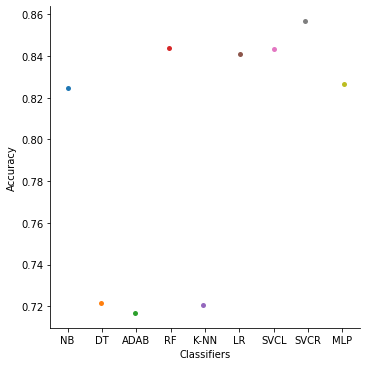

In [ ]:
plt.figure(figsize=(16, 16))
sns.catplot(data = res, x = res['Classifiers'], y = res['Accuracy'])

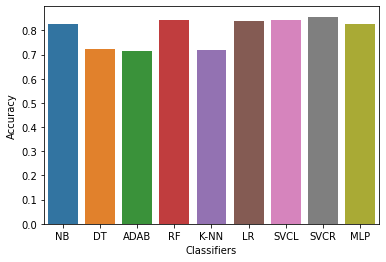

In [ ]:
sns.barplot(data = res, x = res['Classifiers'], y = res['Accuracy'])